<a href="https://colab.research.google.com/github/jane95924/WEEK_9_IP/blob/master/WEEK_9_IP_NAIVE_BAYES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SPAM MAIL CLASSIFICATION.

DEFINING THE QUESTION

a. Specifying the question

 Our task is to predict whether mail sent is spam or not

b.Defining the metrics of success
  We are classifying, we will use an accuracy score to assess our model. an  accuracy score of 80% is good, this means that we will have correctly classified if it is spam or not.

c. Understanding the context
    
  The number of spam mails received nowadays has gone high and finding a way to filter them is everyone's dream come true. Spam mails can be troublesome to many as they waste time, occupy alot of space and reduces the communication bandwidth. We will use the Naive Bayes classifier to classify the mail if they are spam or ham.
d. Recording  experimental design

  i. Loading data and initial data exploration
       
  load the uploaded data, preview the head and tail.

  Check the datatypes,shape and the columns in the dataset.

  ii. Data cleaning

  check for missing values, duplicates,outliers and deal with them.
  
  iii. EDA

  Perform univariate,bivariate and multivariate analysis.  
  
  iv. Modelling

  Use Naive Bayes Classifier
  
   v. conclusion and challenging the solution

e. Data Relevance
 Our dataset contains 58 columns and 4601 rows, this is a large dataset. A description of the dataset is not provided, we have no null values in our dataset. the columns are appropriate in answering our research question.

In [1]:
#importing the libraries we will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#loading the uploaded dataset
data = pd.read_csv('/content/spambase_csv.csv')
#previewig the head
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
#previewing the tail
data.tail()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [4]:
#checking the shape of our dataset
data.shape

(4601, 58)

our dataset has 58 columns and 4601 rows. 

In [5]:
#check the data types of the columns
data.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

our dataset has the right data types. Our target variable Class is int and we are changing to category since we are classifying 

In [7]:
#changing the target variable data type
data['class']=data['class'].astype('category')

In [8]:
#look at the columns in our dataset
data.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


External Data Source Validation. 

I could not find a similar data source to the dataset provided, but from my research on spam mails, frequent words that pop on spam mails have been included in the dataset. Our dataset is appropriate for our question. 

##DATA CLEANING

In [17]:
#checking for null values
data.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

we have no null values in our dataset.

In [10]:
#check for duplicates
data.duplicated().sum()

391

we have 391 duplicates in our dataset and we are going to drop them.

In [11]:
#we will drop the duplicates
data.drop_duplicates(inplace = True)

In [12]:
#check if the duplicates were dropped
data.duplicated().sum()

0

we have no duplicates in our dataset now

##EDA

Text(0.5, 0, 'spam email')

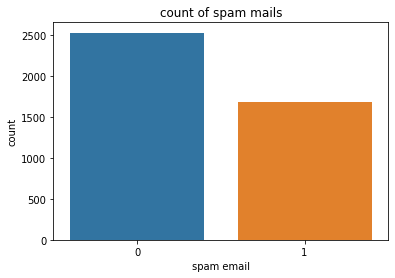

In [13]:
#We take a look at the distribution of the dataset per column
sns.countplot(x='class', data=data)
plt.title('count of spam mails')
plt.ylabel('count')
plt.xlabel('spam email')

most of the mails received were not spam.

Our dataset has so many columns, analysis each column can be difficult,


Text(0.5, 0, 'word_credit')

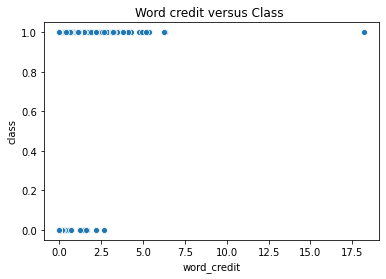

In [14]:
sns.scatterplot(x='word_freq_credit',y='class', data=data)
plt.title('Word credit versus Class ')
plt.ylabel('class')
plt.xlabel('word_credit')

from above, we can see that most mails sent were spam that had word credit.

##NAIVE BAYES CLASSIFIER

Naive Bayes assumes each variable is independent

It has a high accuracy and high speed with huge datasets

Works well with uncorrelated variables.

In [15]:
#check the correlation of the variables 
corr = data.corr().abs()
corr

# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop the highly correlated features 
data.drop(data[to_drop], axis=1, inplace = True)

In [16]:
#check if any column was dropped.
to_drop

['word_freq_415']

In [10]:
#check if any columns were dropped
data.shape

(4210, 57)

one column has been dropped from our dataset.

In [41]:
#we separate the data to dependent and independent variables.
y = data['class']
X = data.drop(['class'],axis = 1)

Our variables are continuous , we are going to use a Gaussian Nave Bayes classifier
Gaussian makes the assumption that our data is normally distributed

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [52]:
#Creating a baseline model.
# Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train)

# Predicting our test predictors
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.8230403800475059


Our baseline model has an accuracy of 82%. it is good but we need to make our model better.

In [42]:
# Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [43]:
# scaling our Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [44]:
# Reducing the dimensions in our dataset
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=10)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(56, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [45]:
# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train)

In [46]:
# Predicting our test predictors
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.9014251781472684


We got an accuracy of 90.14%. our model is doing good so far.


In [47]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))

[[467  28]
 [ 55 292]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       495
           1       0.91      0.84      0.88       347

    accuracy                           0.90       842
   macro avg       0.90      0.89      0.90       842
weighted avg       0.90      0.90      0.90       842



From our confusion matrix, 28 mails were wrongly labelled as spam and 55 were wrongly labelled as non spam. This is a small number if we compare to the total number. our model is doing good.

We now split the data to 70%train and 30% test 

In [48]:
# Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#scaling our data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#reducing our variables using LDA
lda = LDA(n_components=10)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train)

# Predicting our test predictors
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))


0.9081551860649247


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(56, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


Our accuracy score is better than when we did split our data 80-20%. our accuracy score rose to 90.82%

In [49]:
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))

[[693  44]
 [ 72 454]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       737
           1       0.91      0.86      0.89       526

    accuracy                           0.91      1263
   macro avg       0.91      0.90      0.90      1263
weighted avg       0.91      0.91      0.91      1263



the numbers of wrongly labeled elements are more than in our first model. 44 mails were wronly labelled as spam and 72 were wrongly labelled as non spam. our accuracy increased to 91%.

We do split our data to 60% train and 40% test 

In [50]:
# Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

#scaling our data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#reducing our variables using LDA
lda = LDA(n_components=10)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train)

# Predicting our test predictors
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.899643705463183


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(56, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


our accuracy dropped by a very little margin. we have an accuracy of 90%.

In [51]:
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))

[[933  61]
 [108 582]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       994
           1       0.91      0.84      0.87       690

    accuracy                           0.90      1684
   macro avg       0.90      0.89      0.90      1684
weighted avg       0.90      0.90      0.90      1684



The numbers are increasing. More elements are being labelled wrongly.61 false postives and 108 false negatives. we got an accuracy of 90%

To make our model perform better,

1. We can normalize the data
2. Apply smoothing techniques in case where we have frequent zeroes in our dataset.
We already standardized our data, our model perfomance improved.


Conclusion and challenging the solution

Our model generally did well, attaining an accuracy of 90% in each of the model.
Comparing our models to the baseline model accuracy, standardizing the variables and reducing them optimized our model. Our model is reliable, we got a high accuracy score, our metrics of success was achieved. our model did well.